<a href="https://colab.research.google.com/github/201ssc/python_test1/blob/main/3_4_%EC%B0%A8%EC%9B%90%EC%B6%95%EC%86%8C%2C_%ED%8A%B9%EC%84%B1_%EC%B6%95%EC%A4%84_%EB%A7%A4%EB%8B%88%ED%8F%B4%EB%93%9C_%ED%95%99%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
import matplotlib

from sklearn.model_selection import train_test_split

from sklearn.datasets import load_breast_cancer
from sklearn.datasets import make_blobs

from sklearn.preprocessing import QuantileTransformer, StandardScaler, PowerTransformer


import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set(font_scale=3)
sns.set(rc = {'figure.figsize':(12,8)})

from pandas.core.common import random_state

# 3.4  차원축소, 특성 축줄 매니폴드 학습
비지도 학습을 사용해 데이터를 변환하는 이유는 여러가지이다. 가장 일반적인 동기는 시각화하거나, 데이터를 압축하거나, 추가적인 처리를 위해 정보가 더 잘 드러나는 표현을 찾기 위해서이다.
 
 이번 절에서는 이런 용도로 가장 간단하고 흔히 사용하는 알고리즘인 주성분 분석 PCA를 소개한다.  그리고 특성 추출에 널리 사용하는 비음수 행렬 분해와 2차원 산점도를 이용해 시각화 용도로 많이 사용하는 t-SNE 알고리즘도 살펴보자.

\
### 3.4.1 주성분 분석 PCA

주성분 분석은 특성들이 통계적으로 상관관계가 없도록 데이터셋을 회전하는 기술이다. 회전한 뒤에 데이터를 설명하는 데 얼마나 중요하냐에 따라 종종 새로운 특성 중 일부만 선택된다. 다음 예제는 인위적으로 만든 2차원 데이터셋을 사용하여 PAC 효과를 나타낸 것이다.

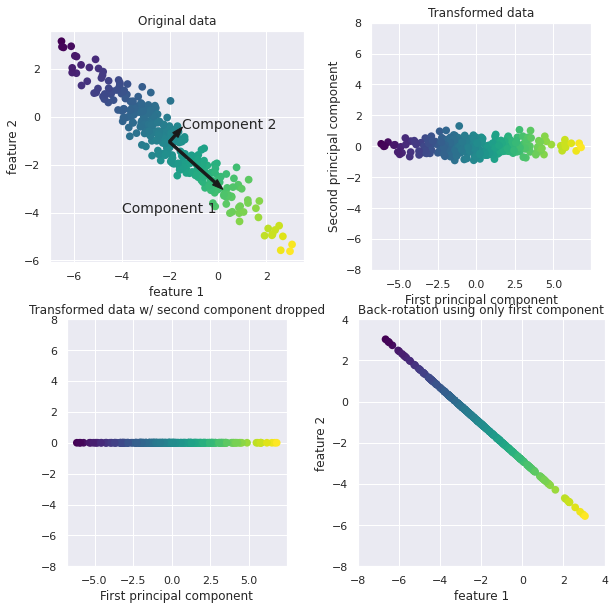

In [5]:
mglearn.plots.plot_pca_illustration()

**첫 번째 그래프**는 (왼쪽 위) 원본 데이터 포인트를 색으로 구분해 표시한 것이다. 이 알고리즘은 먼저'성분 1'이라고 쓰여 있는, 분산이 가장 큰 방향을 찾는다. 이 방향(또는 벡터)이 데이터에서 가장 많은 정보를 담고 있는 방향이다. 다른 말로, 특성들의 상관관계가 가장 큰 방향이다. 그다름으로, 이 알고리즘은 첫 번째 방향과 직각인 방향 중에서 가장 많은 정보를 담은 방향을 찾는다. 2차원에서는 가능한 직각 방향이 하나뿐이지만 고차원에서는 (무한히) 많은 직각 방향이 있을 수 있다. 두 성분을 화살표로 나타냈지만, 사실 화살표의 머리와 꼬리는 아무 의미가 없다. 즉 화살표를 중앙에서 오른 쪽 아래로 향하게 그리지 않고 왼쪽 위로 향하게 그릴 수도 있다. 이런 과정을 거쳐 찾은 방향을 데이터에 있는 주된 분산의 방향이라고 해서 주성분(*principal component*) 이라고 한다. 일반적으로 원본 특성 개수만큼의 주성분이 있다.

\
**두번째 그래프**는(오른쪽 위) 같은 데이터이지만 주성분 1과 2를 각각 x 축과 y축에 나란하도록 회전한 것이다. 회전하기 전에 데이터에서 평균을 빼서 중심을 원점에 맞췄다. PCA에 의해 회전된 두 축은 연관되어 있지 않으므로 변환된 데이터의 상관관계 행열(*correlation matrix*)이 대각선 방향을 제회하고는 0 이 된다.

\
PAC는 주성분의 일부만 남기는 차원 축소 용도로 사용할 수 있다. 이 예에서 **세 번째 그래프**(왼쪽 아래) 처럼 첫 번째 주성분만 유지하려고 한다. 이렇게 하면 2차원 데이터셋이 1차원 데이터셋으로 차원이 감소한다. 그러나 단수히 원본 특성 중 하나만 남기는 것은 아니다. 가장 중요한 방향을 찾아서 그 방향의 성분, 측 첫 번째 주성분을 유지하는 것이다

\
마지막으로 데이터에 다시 평균을 더하고 반대로 회전시킨다. 이 결과가 **마지막 그래프**이다. 이 데이터 포인트들은 원래 특성 공간에 놓여 있지만 첫 번째 주성분의 정보만 담고 있다. 이 변환은 데이터에서 노이즈를 제거하거나 주성분에서 유지되는 정보를 시각화 하는 데 종종 사용된다.


### PCA를 적용해 유방암 데이터셋 시각화하기

PCA가 가장 널리 사용되는 분야는 고차원 데이터셋의 시각화이다. 1장에서 본 것처럼 세 개 이상의 특성을 가진 데이터를 산점도로 표현하기란 쉽지 않다. iris 데이터셋의 경우 두 개씩 짝지은 특성들의 관계를 산점도 행렬로 그릴 수 있다. 하지만, 유방암 데이터셋에는 산섬도 행렬도 어렵다. 이 데이터셋은 특성을 30개나 가지고 있어서(산점도 행렬의 우삼각형 부분만 하더라도) 30 * 14.5 = 435개의 산점도를 그려야 한다(조합의 수). 이렇게 많은 그래프는 이해하기는 커녕 자세히 들여다볼 수도 없다.
이보다 쉬운 방법은 양성과 악성 두 클래스에 대해 각 특성의 히스토 그램을 그리는 것이다.



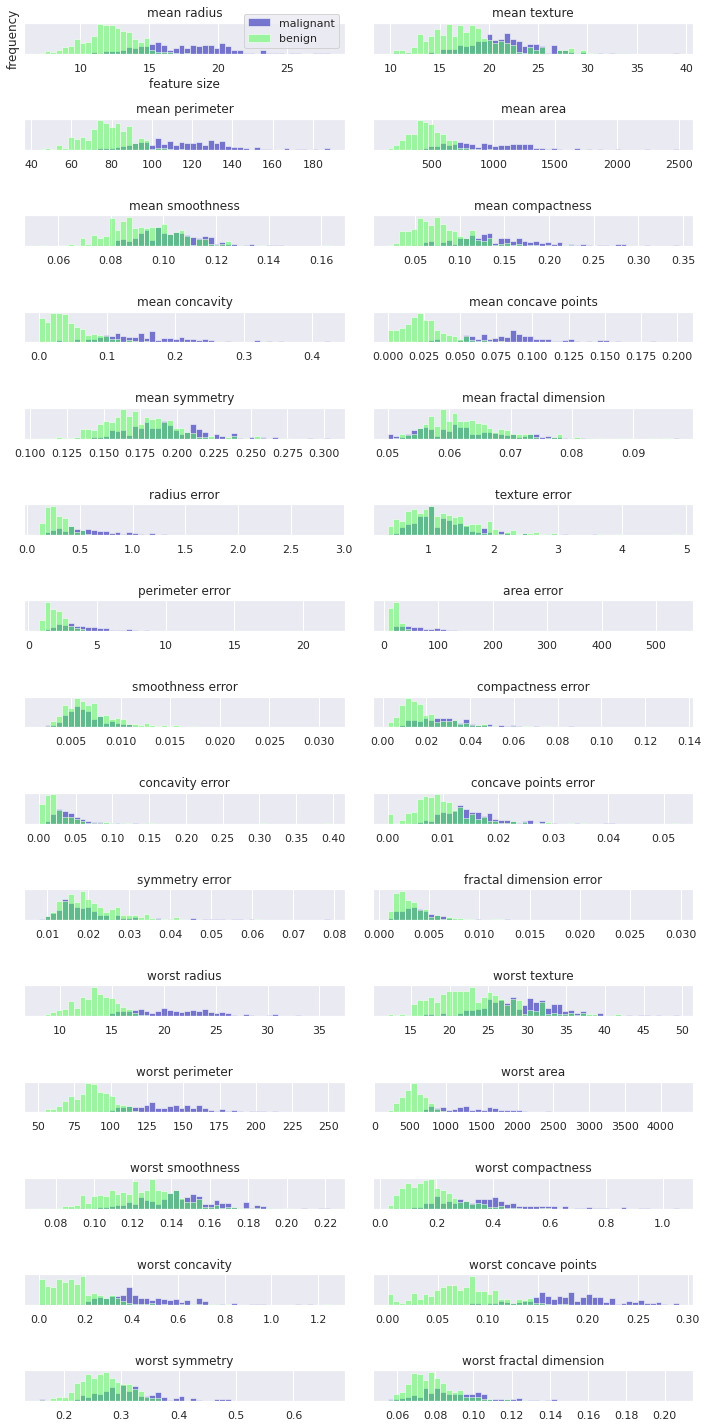

In [9]:
cancer = load_breast_cancer()

fig, axes = plt.subplots(15,2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0] # 악성
benign = cancer.data[cancer.target == 1]     # 양성

ax = axes.ravel()

for i in range(30):
  _, bins = np.histogram(cancer.data[:, i], bins=50)
  ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
  ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
  ax[i].set_title(cancer.feature_names[i])
  ax[i].set_yticks(())
ax[0].set_xlabel('feature size')
ax[0].set_ylabel('frequency')
ax[0].legend(['malignant', 'benign'], loc='best')
fig.tight_layout()


그림은 각 특성에 대한 히스토그램으로 특정 간격(bin)에 얼마나 많은 데이터포인트가 나타나는지 횟수를 센 것이다. 각 그래프는 히스토그램 두 개를 겹쳐놓은 것으로 초록색은 양성 클래스의 포인트를, 그리고 푸른색은 악성 클래스의 포인트를 나타낸다. 이 그름은 특성들이 클래스별로 어떻게 분포되어 있는지를 알려주고, 이를 통해 어떤 특성이 양성과 악성 샘프을 구분하는 데 더 좋은 지 가능해볼 수 있다. 예를 들어 "smoothness error" 특성은 두 히스토그램이 거의 겹쳐져 별로 쓸모가 없다. 하지만 "worst concave points"는 두 히스토그램이 확실히 구분되어 매우 유용한 특성이다.

\
그러나 이 그래프는 특성간 상호작용이나 이 상호작용이 클래스와 어떤 관련이 있는지는 전혀 알려주지 못한다. PCA를 사용하면 주요 상호작용을 찾아낼 수 있어 더 나은 그림을 만들수 있다. 처음 두 개의 주성분을 찾아 2차원 공간에 하나의 산점도로 데이터를 시가화해겠다.

\
PCA를 적용하기 전 StandardScaler를 사용해 각 특성의 분산이 1이 되도록 데이터의 스케일을 조정한다.

In [11]:
scaler = StandardScaler() 
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [13]:
from sklearn.decomposition import PCA
# 데이터의 처음 두 개 주성분만 유지시킨다.
pca = PCA(n_components=2)
# 유방암 데이터로 PCA 모델을 만든다.
pca.fit(X_scaled)

# 처음 두 개의 주성분을 사용해 데이터를 변환한다.
X_pca = pca.transform(X_scaled)
print("원본 데이터 형태:", str(X_scaled.shape))
print("축소된 데이터 형태:", str(X_pca.shape))

원본 데이터 형태: (569, 30)
축소된 데이터 형태: (569, 2)


Text(0.5, 0, 'second principal component')

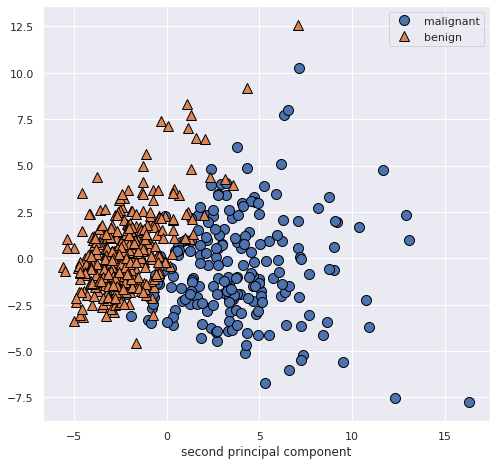

In [16]:
# 맨 처음 두 개의 주성분을 그린다.

# 클래스를 색깔로 구분하여 처음 두 개의 주성분을 그래프로 나타낸다.
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(['malignant', 'benign'], loc='best')
plt.gca().set_aspect('equal')
plt.xlabel("first principal component")
plt.xlabel("second principal component")